
## Payables_Prediction endpoint

In [1]:
import joblib
import pandas as pd
import numpy as np
import json
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from datetime import date,datetime,timedelta
import math
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.cluster import KMeans
import re
import matplotlib.pyplot as plt  
from sklearn.metrics import silhouette_score

# Input Params :
- CompanyID


In [3]:
CompanyID = '2686d26a-efea-4c56-a625-f5fceba231ad'

In [4]:
#print('Starting Modeling_Prediction function.................................................................')
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    
parameters = {'CompanyID' : CompanyID }
response = requests.get("https://cannycosit.gradatim.in/Smeapi/smeapi/AggregatedTransaction/Connection", params=parameters, verify=False)
#jprint(response.json())

res = response.json()

connection_idsty = []
platform_namesty = []
for i in res :
    #print(i['id'])
    connection_idsty.append(i['id'])
    platform_namesty.append(i['platformName'])

AccntNum_df = pd.DataFrame(columns=['Connection_Id','accountNumber'])

for i in connection_idsty :
    parameters = {'CompanyID' : CompanyID, 'ConnectionID' : i}
    response = requests.get("https://cannycosit.gradatim.in/Smeapi/smeapi/AggregatedTransaction/GetBankAccounts", params=parameters, verify=False)
    res = response.json()['results']
    
    for j in range(len(res)):
        AccntNum_df = AccntNum_df.append({'Connection_Id': i, 'accountNumber' : res[j]['id']}, ignore_index=True)



C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
Account_Numisty = AccntNum_df['accountNumber'].tolist()
data_y = 'results'
data_n = 'error'

Date = []
Description = []
Amount = []
Balance = []
TransactionType = []
AccountNumber = [] 

In [6]:
for i in Account_Numisty : 
    parameters = {'CompanyID' : CompanyID, 'AccountID' : i }
    response = requests.get("https://cannycosit.gradatim.in/Smeapi/smeapi/AggregatedTransaction/GetBankTransactions", params=parameters, verify=False)
    
    res = response.json()
    
    if data_y in res.keys():
        print('Yes, Data is there')
        res = response.json()['results']

        #List for required columns in dataframe
        
        for d in res:
            ids = d['date'] 
            Date.append(ids)
            AccountNumber.append(i)
            
        for d in res:
            ids = d['description'] 
            Description.append(ids)

        for d in res:
            ids = d['amount'] 
            Amount.append(ids)

        for d in res:
            ids = d['balance'] 
            Balance.append(ids)

        for d in res:
            ids = d['transactionType'] 
            TransactionType.append(ids)
        
    elif data_n in res.keys():
        continue

C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Yes, Data is there


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cannycosit.gradatim.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
#Creating a Dataframe out of all the lists
Aggegated_df = pd.DataFrame(list(zip(AccountNumber,Date,Description,Amount,Balance,TransactionType)), 
           columns =['Account_Number','Date', 'Description','Amount','Balance','Transaction_Type'])

Aggegated_df['Date'] = Aggegated_df['Date'].apply(pd.to_datetime)
Aggegated_df = Aggegated_df.sort_values(by=['Date'],ignore_index = True, ascending=True)

In [44]:
Aggegated_df

,Account_Number,Date,Description,Amount,Balance,Transaction_Type
0,7612AE7180EFA0327CDA09442AEA91FF,2019-02-15 00:00:00+00:00,INTRST PYMNT,-4.22,708.72,Credit
1,5492FF502F5A4A057A5E4FAE0F33A20E,2019-02-19 00:00:00+00:00,ACH Electronic CreditGUSTO PAY 123456,5850.00,177750.00,Debit
2,A0C22AC61A6ED7CAC11D36CA82141C61,2019-02-19 00:00:00+00:00,CD DEPOSIT .INITIAL.,1000.00,24000.00,Debit
3,7612AE7180EFA0327CDA09442AEA91FF,2019-02-20 00:00:00+00:00,CREDIT CARD 3333 PAYMENT *//,25.00,683.72,Debit
4,7612AE7180EFA0327CDA09442AEA91FF,2019-03-17 00:00:00+00:00,INTRST PYMNT,-4.22,687.94,Credit
...,...,...,...,...,...,...
381,25B3CA22F310E334A1DFAA6E06ED24F7,2021-01-19 00:00:00+00:00,AUTOMATIC PAYMENT - THANK,2078.50,-590.00,Payment
382,25B3CA22F310E334A1DFAA6E06ED24F7,2021-01-19 00:00:00+00:00,Madison Bicycle Shop,500.00,-590.00,Payment
383,25B3CA22F310E334A1DFAA6E06ED24F7,2021-01-20 00:00:00+00:00,Tectra Inc,500.00,-90.00,Debit
384,DA40F61ED011507F2E0625C1C1B92386,2021-01-23 00:00:00+00:00,Uber 072515 SF**POOL**,6.33,110.00,Payment


In [9]:
Aggegated_df.to_csv('Aggre_df.csv')


In [10]:
df1 = Aggegated_df.copy(deep=True)

In [45]:
pred_df =  Aggegated_df.copy(deep=True)

In [11]:
df1.head(2)

,Account_Number,Date,Description,Amount,Balance,Transaction_Type
0,7612AE7180EFA0327CDA09442AEA91FF,2019-02-15 00:00:00+00:00,INTRST PYMNT,-4.22,708.72,Credit
1,5492FF502F5A4A057A5E4FAE0F33A20E,2019-02-19 00:00:00+00:00,ACH Electronic CreditGUSTO PAY 123456,5850.00,177750.00,Debit


In [12]:
df2 = df1[['Description']].copy()

In [13]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

In [14]:
REPLACE_BY_SPACE_RE = re.compile('[_/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z #+_]') #Removed numbers also this time, as I found it doesn't have much importance to the context
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE, "", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = " ".join([word for word in text.split() if not word in stopwords]) # delete stopwords from text
    text = " ".join([word for word in text.split() if not word in STOPWORDS]) # delete stopwords from text
    return text

In [15]:
for i in range(len(df2['Description'])):
    df2['Description'][i] = text_prepare(df2['Description'][i])

In [16]:
df2.head(2)

,Description
0,intrst pymnt
1,ach electronic creditgusto pay


In [17]:
X = df2.Description

In [18]:
print(X.shape)

(386,)


In [19]:
vect = TfidfVectorizer(ngram_range = (1,4)) #Considering only top 5000 features and 1,2,3 & 4 gram 
X_DTM = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

In [20]:
X_DTM.head(2)

,ach,ach electronic,ach electronic creditgusto,ach electronic creditgusto pay,acl,acl conferences,acl conferences reg,adv,agency,airlines,...,woolworths oaktown,woolworths oaktown eft,world,xero,xero subs,xero subs dd,young,young brothers,young brothers inv,young brothers transport
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.316228,0.316228,0.316228,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_DTM.shape

(386, 309)

In [22]:
type(X_DTM)

pandas.core.frame.DataFrame

In [23]:
df1.head(2)

,Account_Number,Date,Description,Amount,Balance,Transaction_Type
0,7612AE7180EFA0327CDA09442AEA91FF,2019-02-15 00:00:00+00:00,INTRST PYMNT,-4.22,708.72,Credit
1,5492FF502F5A4A057A5E4FAE0F33A20E,2019-02-19 00:00:00+00:00,ACH Electronic CreditGUSTO PAY 123456,5850.00,177750.00,Debit


In [24]:
df1.columns

Index(['Account_Number', 'Date', 'Description', 'Amount', 'Balance',
       'Transaction_Type'],
      dtype='object')

In [25]:
#Dropping Columns not requried for Analysis - Dropped Description as it is handeled above

In [26]:
df1 = df1.drop(['Account_Number','Description','Balance','Transaction_Type'],axis=1)

In [27]:
df1.head(2)

,Date,Amount
0,2019-02-15 00:00:00+00:00,-4.22
1,2019-02-19 00:00:00+00:00,5850.00


In [28]:
df1['year']=df1['Date'].dt.year 
df1['month']=df1['Date'].dt.month 
df1['day']=df1['Date'].dt.day

In [29]:
df1 = df1.drop(['Date'],axis=1)

In [30]:
df1.head(2)

,Amount,year,month,day
0,-4.22,2019,2,15
1,5850.00,2019,2,19


In [31]:
df1.shape

(386, 4)

In [32]:
import scipy.stats as stats
df1['Amount'] = stats.zscore(df1['Amount'])

In [33]:
df1.head(2)

,Amount,year,month,day
0,-0.394949,2019,2,15
1,3.302508,2019,2,19


In [34]:
X_DTM.shape

(386, 309)

In [35]:
X_fin = pd.concat([df1, X_DTM], axis=1)

In [36]:
X_fin.head(2)

,Amount,year,month,day,ach,ach electronic,ach electronic creditgusto,ach electronic creditgusto pay,acl,acl conferences,...,woolworths oaktown,woolworths oaktown eft,world,xero,xero subs,xero subs dd,young,young brothers,young brothers inv,young brothers transport
0,-0.394949,2019,2,15,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.302508,2019,2,19,0.316228,0.316228,0.316228,0.316228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cluster_range = range( 2, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(X_DTM)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,334.554978
1,3,311.044184
2,4,292.411122
3,5,261.415133
4,6,244.184185
5,7,222.209120
6,8,193.798490
7,9,180.853846
8,10,164.621209
9,11,153.651971


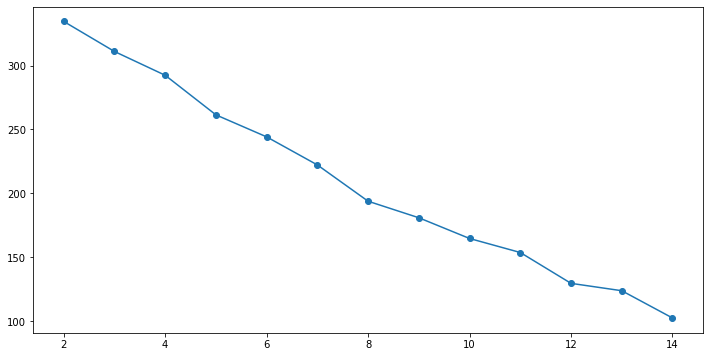

In [39]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [40]:
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(X_DTM)

KMeans(n_clusters=6, random_state=2354)

In [41]:
prediction=cluster.predict(X_DTM)

In [61]:
prediction

array([0, 1, 4, 3, 0, 4, 1, 3, 0, 4, 1, 3, 0, 4, 1, 3, 0, 1, 4, 3, 0, 1,
       4, 3, 0, 1, 4, 3, 0, 3, 2, 1, 4, 3, 5, 0, 0, 3, 0, 0, 5, 2, 0, 3,
       3, 0, 2, 3, 1, 4, 5, 3, 0, 0, 3, 0, 3, 0, 5, 2, 0, 3, 3, 0, 3, 2,
       4, 1, 3, 5, 0, 0, 3, 3, 0, 0, 5, 2, 0, 3, 3, 0, 2, 3, 1, 4, 3, 5,
       0, 0, 3, 0, 3, 0, 5, 2, 0, 3, 0, 3, 2, 3, 1, 4, 3, 5, 0, 0, 0, 3,
       3, 0, 5, 2, 0, 3, 0, 3, 2, 3, 1, 4, 5, 3, 0, 0, 0, 3, 3, 0, 5, 2,
       0, 3, 3, 0, 3, 2, 1, 4, 3, 5, 0, 3, 3, 0, 0, 0, 5, 2, 0, 3, 0, 3,
       2, 3, 1, 4, 3, 5, 0, 3, 3, 0, 0, 0, 5, 2, 0, 3, 3, 0, 3, 2, 1, 4,
       3, 5, 0, 3, 3, 0, 0, 0, 5, 2, 0, 3, 3, 0, 2, 3, 1, 4, 5, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 2,
       4, 0, 1, 3, 5, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 3,
       3, 0, 2, 3, 4, 1, 5, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0,
       1, 4, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
prediction.shape

(386,)

In [46]:
pred_df["GROUP"] = prediction

In [47]:
pred_df.head(2)

,Account_Number,Date,Description,Amount,Balance,Transaction_Type,GROUP
0,7612AE7180EFA0327CDA09442AEA91FF,2019-02-15 00:00:00+00:00,INTRST PYMNT,-4.22,708.72,Credit,0
1,5492FF502F5A4A057A5E4FAE0F33A20E,2019-02-19 00:00:00+00:00,ACH Electronic CreditGUSTO PAY 123456,5850.00,177750.00,Debit,1


In [54]:
pred_df.groupby("GROUP").count()

,Account_Number,Date,Description,Amount,Balance,Transaction_Type
GROUP,,,,,,
0,164,164,164,164,164,164
1,24,24,24,24,24,24
2,34,34,34,34,34,34
3,106,106,106,106,106,106
4,24,24,24,24,24,24
5,34,34,34,34,34,34


In [48]:
pred_df.to_csv('Pred_df.csv')

In [49]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

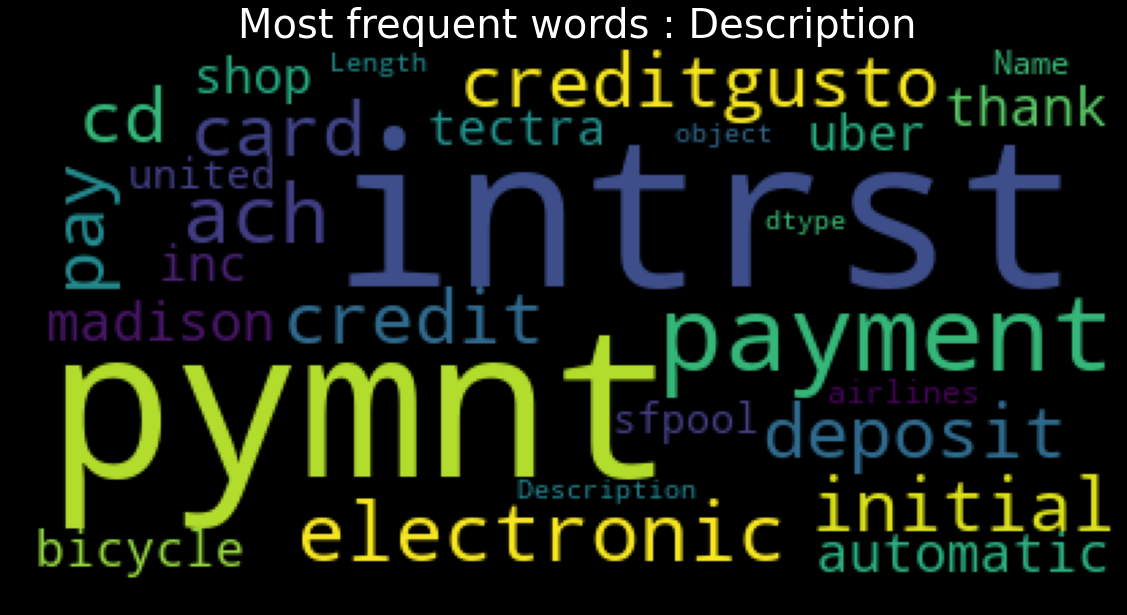

In [53]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud()
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df2['Description']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words : Description", fontsize=40,color='white')
plt.imshow(wc)
plt.show()